<a href="https://colab.research.google.com/github/Anusha5824/Face-Emotion-Detection/blob/main/FER_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:


import numpy as np 
import pandas as pd 

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D, MaxPool2D, AveragePooling2D, Input, BatchNormalization, MaxPooling2D, Activation, Flatten, Dense, Dropout
from keras.models import Sequential
from keras.utils import np_utils
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler
from keras.preprocessing import image
import scipy
import os
import cv2

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/EE_Sem_8/NNDL/fer2013.csv')

In [ ]:
x_data = data['pixels']
y_data = data['emotion']

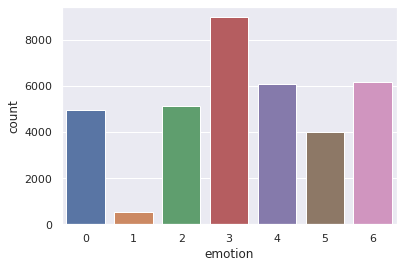

In [ ]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="emotion", data=data)

In [ ]:
oversampler = RandomOverSampler(sampling_strategy='auto')

x_data, y_data = oversampler.fit_resample(x_data.values.reshape(-1,1), y_data)
print(x_data.shape," ",y_data.shape)

(62923, 1)   (62923,)


In [ ]:
y_data.value_counts()

0    8989
2    8989
4    8989
6    8989
3    8989
5    8989
1    8989
Name: emotion, dtype: int64

In [ ]:
x_data = pd.Series(x_data.flatten())
x_data

0        70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1        151 150 147 155 148 133 111 140 170 174 182 15...
2        231 212 156 164 174 138 161 173 182 200 106 38...
3        24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4        4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
                               ...                        
62918    45 20 2 3 0 8 15 12 16 12 6 12 13 15 11 5 12 2...
62919    255 255 255 255 255 252 255 236 139 105 116 12...
62920    237 238 238 236 237 234 231 214 196 180 183 23...
62921    34 32 28 35 39 36 29 41 36 36 50 63 75 62 44 4...
62922    60 50 66 77 66 39 33 34 42 60 74 98 122 156 18...
Length: 62923, dtype: object

In [ ]:
x_data = np.array(list(map(str.split, x_data)), np.float32)
x_data/=255
x_data[:10]

array([[0.27450982, 0.3137255 , 0.32156864, ..., 0.41568628, 0.42745098,
        0.32156864],
       [0.5921569 , 0.5882353 , 0.5764706 , ..., 0.75686276, 0.7176471 ,
        0.72156864],
       [0.90588236, 0.83137256, 0.6117647 , ..., 0.34509805, 0.43137255,
        0.59607846],
       ...,
       [0.3019608 , 0.30588236, 0.30980393, ..., 0.49019608, 0.2627451 ,
        0.26666668],
       [0.33333334, 0.32941177, 0.3529412 , ..., 0.22745098, 0.28627452,
        0.32941177],
       [1.        , 0.99607843, 1.        , ..., 0.99607843, 1.        ,
        1.        ]], dtype=float32)

In [ ]:
x_data = x_data.reshape(-1, 48, 48, 1)
x_data.shape

(62923, 48, 48, 1)

In [ ]:
y_data = np.array(y_data)
y_data = y_data.reshape(y_data.shape[0], 1)
y_data.shape

(62923, 1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.1, random_state = 45)

In [ ]:
model = Sequential([
    Input((48, 48, 1)),
    Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='valid'),
    BatchNormalization(axis=3),
    Activation('relu'),
    Conv2D(64, (3,3), strides=(1,1), padding = 'same'),
    BatchNormalization(axis=3),
    Activation('relu'),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), strides=(1,1), padding = 'valid'),
    BatchNormalization(axis=3),
    Activation('relu'),
    Conv2D(128, (3,3), strides=(1,1), padding = 'same'),
    BatchNormalization(axis=3),
    Activation('relu'),
    MaxPooling2D((2,2)),
    Conv2D(128, (3,3), strides=(1,1), padding = 'valid'),
    BatchNormalization(axis=3),
    Activation('relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(200, activation='relu'),
    Dropout(0.6),
    Dense(7, activation = 'softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 46, 46, 32)       128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 46, 46, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 46, 46, 64)       256       
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 46, 46, 64)        0

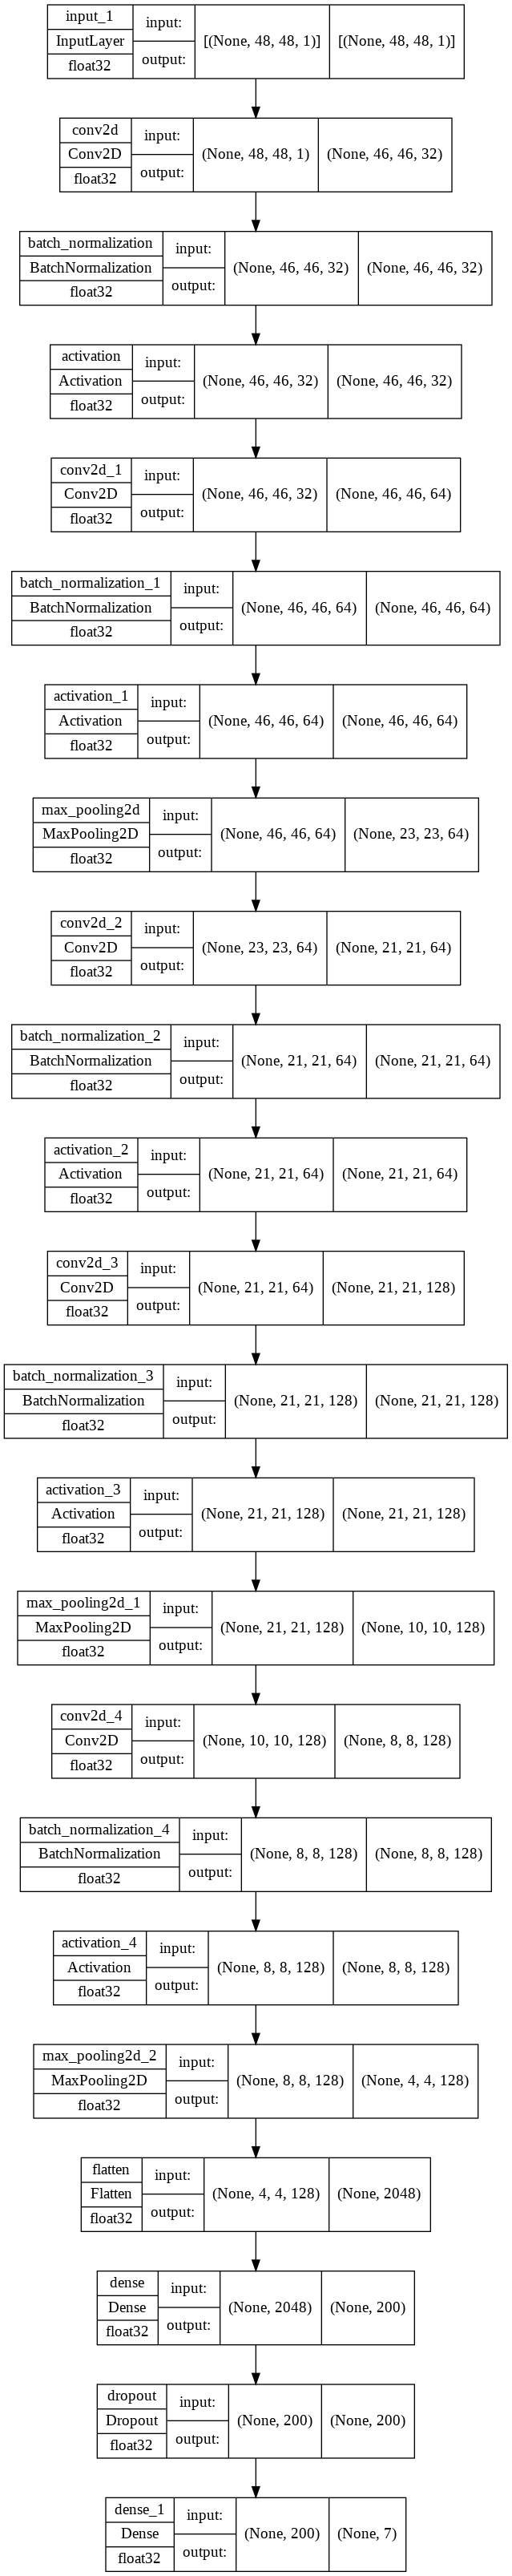

In [ ]:
tf.keras.utils.plot_model(model, to_file = "model.png", show_shapes = True, show_dtype = True)


In [ ]:
adam = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
y_train = np_utils.to_categorical(y_train, 7)
y_train.shape

(56630, 7)

In [ ]:
y_test = np_utils.to_categorical(y_test, 7)
y_test.shape

(6293, 7)

In [ ]:
history = model.fit(x_train, y_train, epochs = 30, validation_data=(x_test, y_test))

Epoch 1/30
1770/1770 [==============================] - 59s 27ms/step - loss: 1.7400 - accuracy: 0.3172 - val_loss: 1.4468 - val_accuracy: 0.4494
Epoch 2/30
1770/1770 [==============================] - 50s 28ms/step - loss: 1.3968 - accuracy: 0.4650 - val_loss: 1.1888 - val_accuracy: 0.5568
Epoch 3/30
1770/1770 [==============================] - 51s 29ms/step - loss: 1.2161 - accuracy: 0.5350 - val_loss: 1.0897 - val_accuracy: 0.5853
Epoch 4/30
1770/1770 [==============================] - 51s 29ms/step - loss: 1.1003 - accuracy: 0.5767 - val_loss: 0.9977 - val_accuracy: 0.6228
Epoch 5/30
1770/1770 [==============================] - 50s 28ms/step - loss: 1.0109 - accuracy: 0.6099 - val_loss: 0.9603 - val_accuracy: 0.6277
Epoch 6/30
1770/1770 [==============================] - 50s 28ms/step - loss: 0.9374 - accuracy: 0.6419 - val_loss: 0.8833 - val_accuracy: 0.6714
Epoch 7/30
1770/1770 [==============================] - 50s 28ms/step - loss: 0.8630 - accuracy: 0.6733 - val_loss: 0.8512 -

In [ ]:
print("Accuracy of our model on validation data : " , model.evaluate(x_test,y_test)[1]*100 , "%")


197/197 [==============================] - 2s 11ms/step - loss: 0.9459 - accuracy: 0.8206
Accuracy of our model on validation data :  82.0594310760498 %


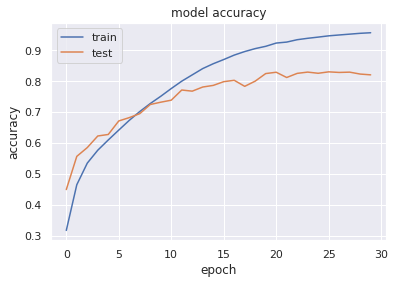

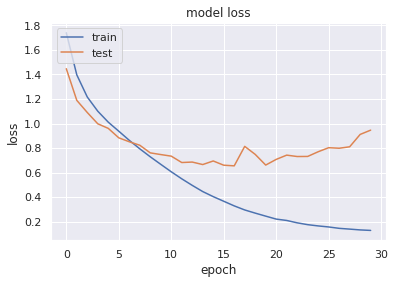

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
y_pred = model.predict(x_test)
y_result = []

for pred in y_pred:
    y_result.append(np.argmax(pred))
y_result[:10]

[6, 5, 0, 6, 1, 0, 3, 4, 1, 4]

In [ ]:
y_actual = []

for pred in y_test:
    y_actual.append(np.argmax(pred))
y_actual[:10]

[6, 5, 5, 6, 1, 0, 3, 4, 1, 3]

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_actual, y_result))

              precision    recall  f1-score   support

           0       0.75      0.87      0.80       935
           1       0.99      1.00      1.00       895
           2       0.76      0.83      0.79       880
           3       0.88      0.69      0.77       906
           4       0.67      0.76      0.71       888
           5       0.96      0.91      0.93       869
           6       0.80      0.70      0.74       920

    accuracy                           0.82      6293
   macro avg       0.83      0.82      0.82      6293
weighted avg       0.83      0.82      0.82      6293



Text(66.5, 0.5, 'Truth')

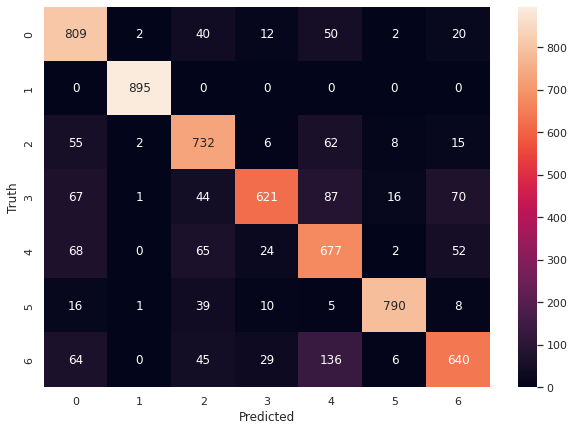

In [ ]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels = y_actual, predictions = y_result)

plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
fer_json = model.to_json()  
with open("fer.json", "w") as json_file:  
    json_file.write(fer_json)  
model.save("model.h5") 